In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats.mstats import winsorize

In [23]:
df = pd.read_excel (r'D:\User\Desktop\thesis\data\blockholders\main data\Holder\TSE_HOLDERSS_FIRM_YEAR.xlsx')
df.head(10)

,Holder,Holder_id,type,firm,jalaliDate,year,End_year_Percent,End_year_Market_cap,Mean_yearly_totalownership,Mean_yearly_firm_ownership,Mean_yearly_marketcap
0,Donhauser GmbH,62590,private corportion,گدنا,13991227,1399,34.99,1.021440e+07,37.514236,37.514236,7.459673e+06
1,Donhauser GmbH,62590,private corportion,گدنا,14001127,1400,29.99,3.351000e+06,34.830183,34.830183,6.242253e+06
2,FIN Zf Friedrichshafen Ag,71127,private corportion,خچرخش,14001127,1400,16.69,5.046102e+06,16.690000,16.690000,1.073982e+07
3,Gif Spc,48571,private corportion,آسامید,13991218,1399,5.36,1.164300e+06,12.363503,5.621087,1.074452e+06
4,Gif Spc,48571,private corportion,افران,13991227,1399,6.78,6.457500e+06,12.363503,14.417483,2.050998e+06
5,Gif Spc,48571,private corportion,افران,14000124,1400,5.82,6.539000e+06,6.644615,6.644615,1.885233e+07
6,NokiaSiemens,566,private corportion,لکما,13871228,1387,20.00,8.012700e+04,20.000000,20.000000,8.067133e+04
7,NokiaSiemens,566,private corportion,لکما,13881226,1388,20.00,1.380886e+05,20.000000,20.000000,1.352046e+05
8,NokiaSiemens,566,private corportion,لکما,13891228,1389,20.00,1.198528e+05,20.000000,20.000000,1.179800e+05
9,NokiaSiemens,566,private corportion,لکما,13901228,1390,20.00,8.012700e+04,19.996208,19.996208,7.419448e+04


In [24]:
df.Holder_id.nunique()

2042

In [25]:
df.firm.nunique()

770

In [33]:
dg=df.groupby(['type'])[['Holder_id']].nunique()
dg


,Holder_id
type,
financial institution,457
government,55
individual,645
mutual fund,42
pension fund,56
private corportion,787


In [34]:
len(df)

19857

In [35]:
df.type.value_counts()

financial institution    7770
private corportion       5901
individual               3101
pension fund             1576
government               1387
mutual fund               122
Name: type, dtype: int64

# Average_number of block _held in year

In [37]:
df2 = pd.read_excel (r'D:\User\Desktop\thesis\data\blockholders\main data\Holder\Holders_year_unique firm number.xlsx')
df2.head(5)

,Holder,Holder_id,type,year,Firm_Number,Mean_yearly_totalownership
0,Donhauser GmbH,62590,private corportion,1399,1,37.514236
1,Donhauser GmbH,62590,private corportion,1400,1,34.830183
2,FIN Zf Friedrichshafen Ag,71127,private corportion,1400,1,16.690000
3,Gif Spc,48571,private corportion,1399,2,12.363503
4,Gif Spc,48571,private corportion,1400,1,6.644615


In [39]:
df2.Firm_Number.describe()

count    10424.000000
mean         1.904931
std          2.829254
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         46.000000
Name: Firm_Number, dtype: float64

In [38]:
gg=df2.groupby(['type'])[['Firm_Number']].mean()
gg

,Firm_Number
type,
financial institution,2.902503
government,3.152273
individual,1.085784
mutual fund,1.418605
pension fund,3.573696
private corportion,1.503823


In [40]:
cc=df2.groupby(['year','type'])[['Firm_Number']].mean().reset_index()
cc

,year,type,Firm_Number
0,1387,financial institution,3.700000
1,1387,government,3.086957
2,1387,individual,1.084337
3,1387,pension fund,3.500000
4,1387,private corportion,1.453704
...,...,...,...
75,1400,government,2.488889
76,1400,individual,1.095082
77,1400,mutual fund,1.476190
78,1400,pension fund,3.297297


In [44]:
cc.loc[cc.type=='private corportion']

,year,type,Firm_Number
4,1387,private corportion,1.453704
9,1388,private corportion,1.479339
15,1389,private corportion,1.464052
20,1390,private corportion,1.441748
25,1391,private corportion,1.478873
31,1392,private corportion,1.482906
37,1393,private corportion,1.491453
43,1394,private corportion,1.561475
49,1395,private corportion,1.531469
55,1396,private corportion,1.490099


In [45]:
cc1 = cc.pivot(index='year', columns='type')['Firm_Number']
cc1 = cc1.reset_index(drop=False)
cc1.columns = ['year', 'financial institution','government','individual','mutual fund','pension fund','private corportion']
cc1

,year,financial institution,government,individual,mutual fund,pension fund,private corportion
0,1387,3.700000,3.086957,1.084337,NaN,3.500000,1.453704
1,1388,3.654867,3.680000,1.057851,NaN,3.739130,1.479339
2,1389,3.625000,3.760000,1.030769,1.000000,4.652174,1.464052
3,1390,3.403846,3.555556,1.073620,NaN,4.103448,1.441748
4,1391,3.018987,3.807692,1.066667,NaN,3.878788,1.478873
5,1392,2.920732,3.629630,1.063953,1.000000,4.172414,1.482906
6,1393,2.849057,3.384615,1.031847,1.000000,4.192308,1.491453
7,1394,2.747059,3.259259,1.053691,1.000000,3.333333,1.561475
8,1395,2.729167,3.068966,1.088670,1.875000,3.147059,1.531469
9,1396,2.669355,2.810811,1.123746,1.500000,3.097561,1.490099


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


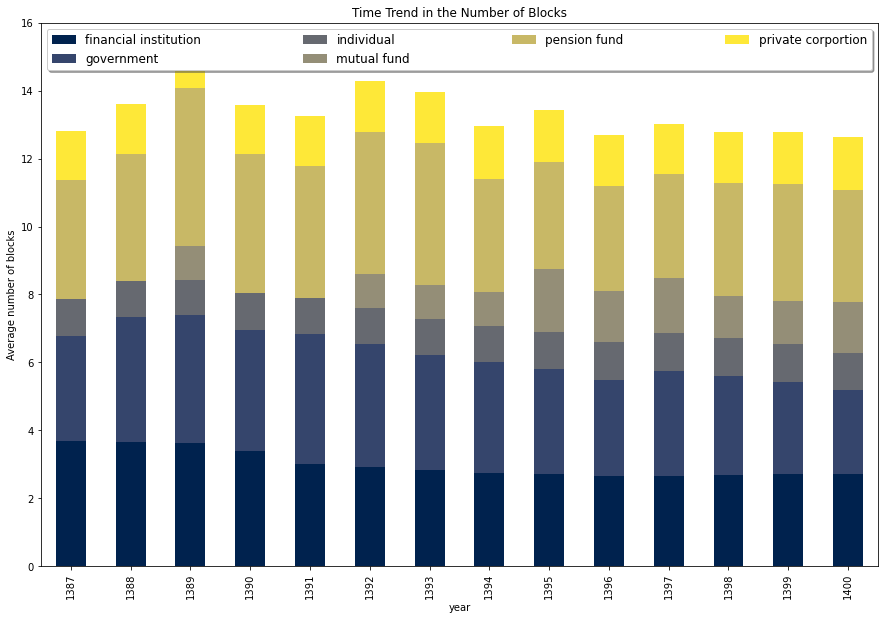

In [46]:
cc1.plot(x='year', kind='bar', stacked=True,ylabel='Average number of blocks', title='Time Trend in the Number of Blocks',
figsize=(15,10),ylim=(0,16),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('foo.eps', bbox_inches='tight')        

# Average_size of block _held in year

In [48]:
df.head(5)

,Holder,Holder_id,type,firm,jalaliDate,year,End_year_Percent,End_year_Market_cap,Mean_yearly_totalownership,Mean_yearly_firm_ownership,Mean_yearly_marketcap
0,Donhauser GmbH,62590,private corportion,گدنا,13991227,1399,34.99,1.021440e+07,37.514236,37.514236,7.459673e+06
1,Donhauser GmbH,62590,private corportion,گدنا,14001127,1400,29.99,3.351000e+06,34.830183,34.830183,6.242253e+06
2,FIN Zf Friedrichshafen Ag,71127,private corportion,خچرخش,14001127,1400,16.69,5.046102e+06,16.690000,16.690000,1.073982e+07
3,Gif Spc,48571,private corportion,آسامید,13991218,1399,5.36,1.164300e+06,12.363503,5.621087,1.074452e+06
4,Gif Spc,48571,private corportion,افران,13991227,1399,6.78,6.457500e+06,12.363503,14.417483,2.050998e+06


In [50]:
df.Mean_yearly_firm_ownership.describe()

count    19857.000000
mean        22.186550
std         21.468568
min          5.000000
25%          7.200000
50%         12.670000
75%         29.130000
max         99.900000
Name: Mean_yearly_firm_ownership, dtype: float64

In [51]:
df.groupby(['type'])[['Mean_yearly_firm_ownership']].describe()


Mean_yearly_firm_ownership                             \
                                           count       mean        std  min   
type                                                                          
financial institution                     7770.0  22.849148  21.740816  5.0   
government                                1387.0  25.809865  20.746727  5.0   
individual                                3101.0  11.447184  11.574141  5.0   
mutual fund                                122.0  12.212319  15.832019  5.0   
pension fund                              1576.0  18.751888  17.366930  5.0   
private corportion                        5901.0  27.229548  24.013453  5.0   

                                                                   
                             25%        50%        75%        max  
type                                                               
financial institution   7.538607  12.961383  31.992901  98.880000  
government             10.325476  19.510000  31.387528  95.448025  
individual              5.780000   7.647143  11.440000  95.040000  
mutual fund             5.030737   5.680081  11.280714  95.424211  
pension fund            7.780868  13.064429  20.531359  97.800000  
private corportion      8.266584  16.700000  43.200000  99.900000

In [52]:
qq=df.groupby(['year','type'])[['Mean_yearly_firm_ownership']].mean().reset_index()
qq

,year,type,Mean_yearly_firm_ownership
0,1387,financial institution,20.509489
1,1387,government,34.656393
2,1387,individual,10.017052
3,1387,pension fund,20.008051
4,1387,private corportion,26.752203
...,...,...,...
75,1400,government,21.181089
76,1400,individual,12.389484
77,1400,mutual fund,9.326388
78,1400,pension fund,19.394509


In [54]:
qq = qq.pivot(index='year', columns='type')['Mean_yearly_firm_ownership']
qq = qq.reset_index(drop=False)
qq.columns = ['year', 'financial institution','government','individual','mutual fund','pension fund','private corportion']
qq

,year,financial institution,government,individual,mutual fund,pension fund,private corportion
0,1387,20.509489,34.656393,10.017052,NaN,20.008051,26.752203
1,1388,20.357055,31.003599,10.260436,NaN,17.752299,25.569185
2,1389,19.906637,29.040874,10.267785,6.368734,16.733666,23.613393
3,1390,20.713055,28.564756,10.820356,NaN,16.137508,25.470755
4,1391,23.209298,25.028959,10.946146,NaN,17.501361,27.930479
5,1392,23.454625,24.728743,11.121921,51.837143,19.426918,27.904904
6,1393,24.998391,26.052698,11.011660,63.908308,19.968948,28.711843
7,1394,24.543296,25.743367,11.300237,12.128448,18.690485,28.448507
8,1395,24.820576,25.866953,12.346259,18.503233,19.754991,28.114925
9,1396,23.797728,24.919429,11.351151,11.653383,18.964200,26.553875


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


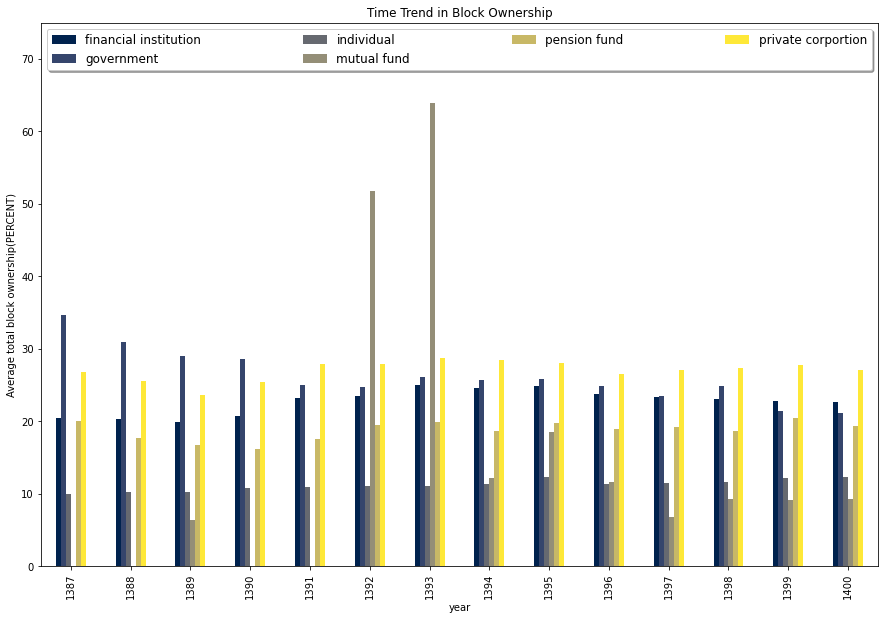

In [61]:
qq.plot(x='year', kind='bar', stacked=False,ylabel='Average total block ownership(PERCENT)', title='Time Trend in Block Ownership',
figsize=(15,10),ylim=(0,75),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('fooOO.eps', bbox_inches='tight')      

# Average blocksize for holders Broken Down by Year

In [ ]:
df.head()

,Holder,Holder_id,type,firm,jalaliDate,year,End_year_Percent,End_year_Market_cap,Mean_yearly_totalownership,Mean_yearly_firm_ownership,Mean_yearly_marketcap
0,Donhauser GmbH,62590,private corportion,گدنا,13991227,1399,34.99,1.021440e+07,37.514236,37.514236,7.459673e+06
1,Donhauser GmbH,62590,private corportion,گدنا,14001127,1400,29.99,3.351000e+06,34.830183,34.830183,6.242253e+06
2,FIN Zf Friedrichshafen Ag,71127,private corportion,خچرخش,14001127,1400,16.69,5.046102e+06,16.690000,16.690000,1.073982e+07
3,Gif Spc,48571,private corportion,آسامید,13991218,1399,5.36,1.164300e+06,12.363503,5.621087,1.074452e+06
4,Gif Spc,48571,private corportion,افران,13991227,1399,6.78,6.457500e+06,12.363503,14.417483,2.050998e+06


In [ ]:
qq=df.groupby(['year'])[['Mean_yearly_firm_ownership']].mean()
qq=qq.reset_index(drop=False)
qq.columns = ['year', 'Average blocksize']
qq

,year,Average blocksize
0,1387,21.835500
1,1388,20.798121
2,1389,19.951139
3,1390,20.623636
4,1391,22.187029
5,1392,22.602921
6,1393,23.874202
7,1394,23.547459
8,1395,23.488044
9,1396,22.046160


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


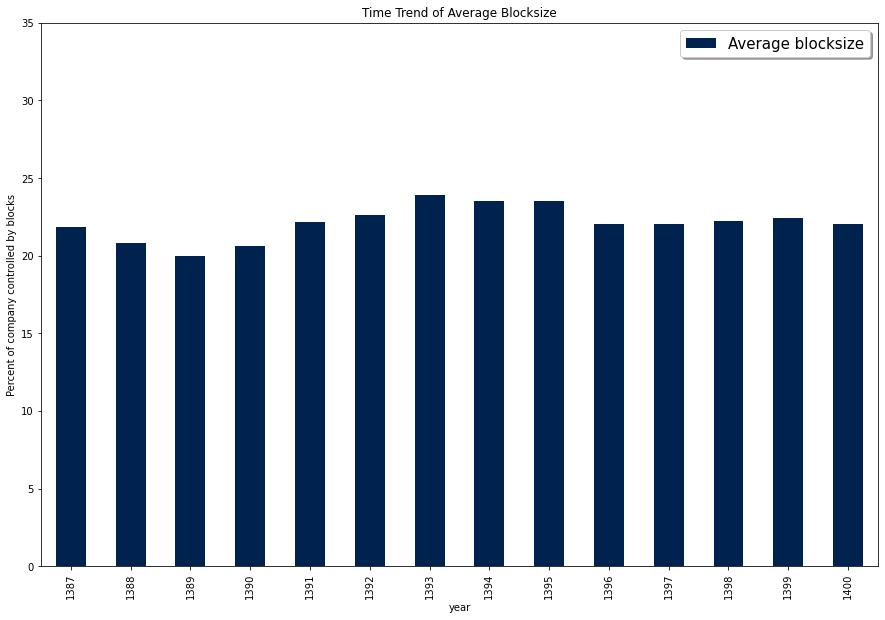

In [105]:
qq.plot(x='year', kind='bar',stacked=False,ylabel='Percent of company controlled by blocks', title='Time Trend of Average Blocksize',
figsize=(15,10),ylim=(0,35),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='upper right', ncol = 1,fancybox=True, shadow=True,prop={'size':15})

plt.savefig('fooOOffdfjuoooo.eps', bbox_inches='tight')   

# numeber of  blocks of blockholder 

In [ ]:
df2.head()

,Holder,Holder_id,type,year,Firm_Number,Mean_yearly_totalownership
0,Donhauser GmbH,62590,private corportion,1399,1,37.514236
1,Donhauser GmbH,62590,private corportion,1400,1,34.830183
2,FIN Zf Friedrichshafen Ag,71127,private corportion,1400,1,16.690000
3,Gif Spc,48571,private corportion,1399,2,12.363503
4,Gif Spc,48571,private corportion,1400,1,6.644615


In [ ]:
ooo = df2.groupby(['year','Firm_Number']).nunique().reset_index()
ooo['total'] = ooo.groupby('year').Holder_id.transform(sum)
ooo['percent'] = (ooo.Holder_id/ooo.total)*100
ooo['Portfo_size'] = '1'
ooo.loc[ooo.Firm_Number > 1,'Portfo_size'] = '2'
ooo.loc[ooo.Firm_Number > 2,'Portfo_size'] = '3-5'
ooo.loc[ooo.Firm_Number > 5,'Portfo_size'] = '>5'
ooo


,year,Firm_Number,Holder,Holder_id,type,Mean_yearly_totalownership,total,percent,Portfo_size
0,1387,1,153,230,5,216,334,68.862275,1
1,1387,2,37,39,5,39,334,11.676647,2
2,1387,3,19,20,4,20,334,5.988024,3-5
3,1387,4,15,15,3,15,334,4.491018,3-5
4,1387,5,5,5,2,5,334,1.497006,3-5
...,...,...,...,...,...,...,...,...,...
264,1400,17,2,2,1,2,1149,0.174064,>5
265,1400,19,1,1,1,1,1149,0.087032,>5
266,1400,22,3,3,2,3,1149,0.261097,>5
267,1400,29,1,1,1,1,1149,0.087032,>5


In [ ]:
ooo=ooo.groupby(['year','Portfo_size'])[['percent']].sum().reset_index()
ooo

,year,Portfo_size,percent
0,1387,1,68.862275
1,1387,2,11.676647
2,1387,3-5,11.976048
3,1387,>5,7.485030
4,1388,1,71.464020
5,1388,2,10.421836
6,1388,3-5,10.173697
7,1388,>5,7.940447
8,1389,1,72.787611
9,1389,2,10.176991


In [ ]:
ooo=ooo.pivot(index='year', columns='Portfo_size')['percent']
ooo=ooo.reset_index(drop=False)
ooo.columns = ['year', '1 Block','3_5 Blocks','2 Blocks','5+ Blocks']
ooo=ooo[['year','1 Block','2 Blocks','3_5 Blocks','5+ Blocks']]
ooo

,year,1 Block,2 Blocks,3_5 Blocks,5+ Blocks
0,1387,68.862275,11.976048,11.676647,7.485030
1,1388,71.464020,10.173697,10.421836,7.940447
2,1389,72.787611,8.849558,10.176991,8.185841
3,1390,72.633391,7.745267,11.876076,7.745267
4,1391,73.781513,7.899160,11.596639,6.722689
5,1392,73.205742,8.452951,12.280702,6.060606
6,1393,75.206612,8.099174,10.578512,6.115702
7,1394,73.767886,8.108108,11.605723,6.518283
8,1395,73.138298,8.377660,12.765957,5.718085
9,1396,74.735831,9.029779,11.431316,4.803074


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


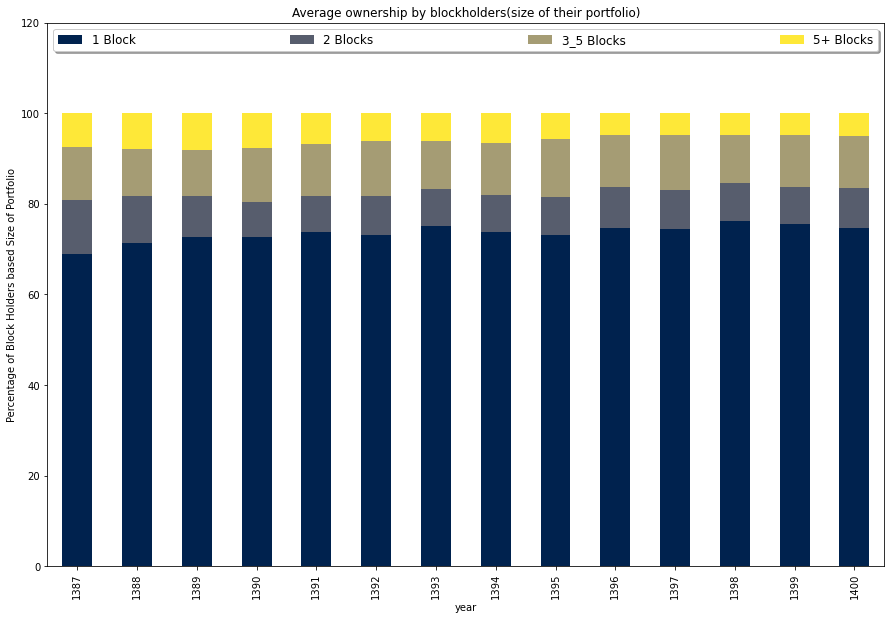

In [116]:
ooo.plot(x='year', kind='bar', stacked=True,ylabel='Percentage of Block Holders based Size of Portfolio', title='Average ownership by blockholders(size of their portfolio)',
figsize=(15,10),ylim=(0,120),cmap='cividis')


plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('fooOOoovfvfvfogfg.eps', bbox_inches='tight')  

# Summary Statistics at the Company-Year Level

In [80]:
df3 = pd.read_excel (r'D:\User\Desktop\thesis\data\blockholders\main data\firm\firm_charactristic4.xlsx')

In [81]:
len(df3)

6528

In [83]:
df3.describe()

,year,Mean_marketcap,total_percent_ownership,institutional_percent_ownership,Holder_Number,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,Diversity_identity,Diversity_size,Diversity_horizon,Diversity_Index
count,6528.000000,6.528000e+03,6528.000000,6528.00000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6.528000e+03
mean,1394.689032,2.219301e+07,66.203215,60.64565,2.756434,2.566789,1.811428,1.621936,0.235138,0.223661,0.185492,-2.637162e-16
std,3.999976,7.251747e+07,24.255669,28.37155,1.731685,1.769413,0.794965,0.811188,0.241101,0.239884,0.222265,3.381498e-01
min,1387.000000,2.117862e+04,5.000000,0.00000,1.000000,0.000000,1.000000,0.000000,-2.352052,-1.619794,-1.822717,-8.387153e-01
25%,1391.000000,5.465876e+05,51.042500,40.59000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-2.583334e-01
50%,1395.000000,2.161943e+06,71.520000,68.71000,2.000000,2.000000,2.000000,2.000000,0.230521,0.185883,0.116641,1.902454e-02
75%,1398.000000,1.147530e+07,84.592500,83.65500,4.000000,3.000000,2.000000,2.000000,0.452399,0.445083,0.390622,3.735979e-01
max,1400.000000,6.102392e+08,106.000000,96.81000,21.000000,20.000000,5.000000,5.000000,0.768835,0.744865,0.666377,2.766365e+00


# Average Number of Block Broken Down by Year

In [63]:
ww=df3.groupby(['year'])[['Holder_Number']].mean()
ww=ww.reset_index(drop=False)
ww.columns = ['year', 'Average Number of Blocks']
ww


,year,Average Number of Blocks
0,1387,2.372093
1,1388,2.628571
2,1389,2.756024
3,1390,3.091667
4,1391,2.906166
5,1392,2.983957
6,1393,2.817460
7,1394,2.839695
8,1395,2.736383
9,1396,2.858639


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


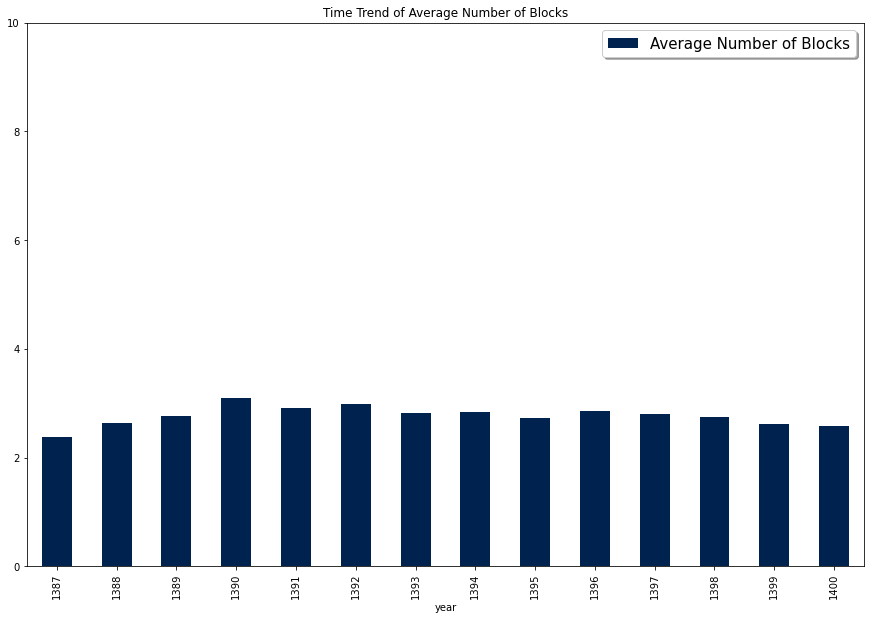

In [64]:
ww.plot(x='year', kind='bar', stacked=False, title='Time Trend of Average Number of Blocks',
figsize=(15,10),ylim=(0,10),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='upper right', ncol = 1,fancybox=True, shadow=True,prop={'size':15})

plt.savefig('fooOOjjujuoooo.eps', bbox_inches='tight')   

# Average Number of Block Types Broken Down by Year

In [71]:
df3.groupby(['year','type_Number']).count().reset_index().groupby('type_Number').firm.mean()

type_Number
1    185.428571
2    196.642857
3     71.785714
4     11.571429
5      1.714286
Name: firm, dtype: float64

In [72]:
tempt = df3.groupby(['year','type_Number']).count().reset_index()
tempt['total'] = tempt.groupby('year').firm.transform(sum)
tempt['percent'] = (tempt.firm/tempt.total)*100
#tempt.groupby('type_Number').percent.mean()
tempt

,year,type_Number,firm,group_name,Holder_Number,total,percent
0,1387,1,130,130,130,301,43.189369
1,1387,2,142,142,142,301,47.176080
2,1387,3,26,26,26,301,8.637874
3,1387,4,3,3,3,301,0.996678
4,1388,1,122,122,122,315,38.730159
...,...,...,...,...,...,...,...
58,1400,1,333,333,333,737,45.183175
59,1400,2,293,293,293,737,39.755767
60,1400,3,97,97,97,737,13.161465
61,1400,4,13,13,13,737,1.763908


In [73]:
tempt=tempt.pivot(index='year', columns='type_Number')['percent']
tempt=tempt.reset_index(drop=False)
tempt.columns = ['year', '1type', '2type', '3type', '4type', '5type']
tempt

,year,1type,2type,3type,4type,5type
0,1387,43.189369,47.176080,8.637874,0.996678,NaN
1,1388,38.730159,46.666667,13.333333,1.269841,NaN
2,1389,40.361446,42.771084,14.457831,2.409639,NaN
3,1390,33.055556,44.166667,20.277778,2.500000,NaN
4,1391,34.852547,42.895442,19.302949,2.949062,NaN
5,1392,31.818182,45.454545,20.053476,2.673797,NaN
6,1393,36.772487,42.063492,17.724868,3.174603,0.264550
7,1394,36.895674,40.966921,18.829517,3.053435,0.254453
8,1395,40.087146,40.305011,16.122004,2.832244,0.653595
9,1396,38.219895,42.233857,16.055846,2.792321,0.698080


In [85]:
tempt.describe()

,year,1type,2type,3type,4type,5type
count,14.0000,14.000000,14.000000,14.000000,14.000000,7.000000
mean,1393.5000,39.024510,42.694003,15.657346,2.458611,0.331061
std,4.1833,4.181853,2.416195,3.325005,0.725404,0.241180
min,1387.0000,31.818182,39.650146,8.637874,0.996678,0.135685
25%,1390.2500,36.803284,40.966029,13.426791,1.925340,0.155531
50%,1393.5000,39.034501,42.439242,15.383295,2.733059,0.254453
75%,1396.7500,41.749240,43.848861,18.553354,3.027342,0.459073
max,1400.0000,45.626822,47.176080,20.277778,3.174603,0.698080


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


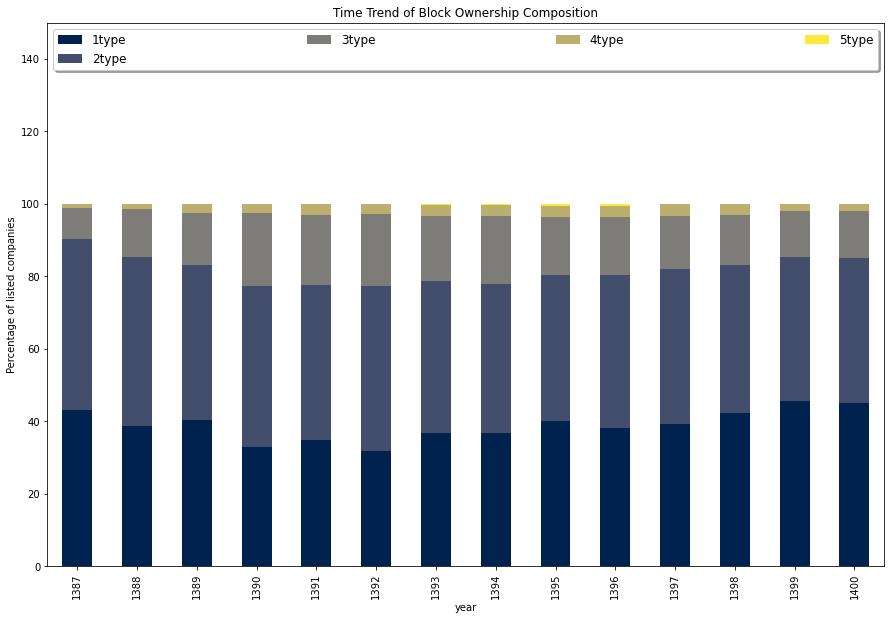

In [74]:
tempt.plot(x='year', kind='bar', stacked=True,ylabel='Percentage of listed companies', title='Time Trend of Block Ownership Composition',
figsize=(15,10),ylim=(0,150),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('fooOOoooo.eps', bbox_inches='tight')    

# Average Number of Holdernumber Broken Down by Year

In [87]:
ccc = df3.groupby(['year','Holder_Number']).count().reset_index()
ccc['total'] = ccc.groupby('year').firm.transform(sum)
ccc['Cumsum'] = ccc.sort_values(by = ['year','Holder_Number'] , ascending =False).groupby(['year']).firm.transform(lambda x: x.cumsum())
ccc.drop(ccc[ccc['Holder_Number'] > 4].index, inplace = True)
ccc['percent'] = (ccc.Cumsum/ccc.total)*100
ccc   

,year,Holder_Number,firm,group_name,Mean_marketcap,total_percent_ownership,institutional_percent_ownership,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,Diversity_identity,Diversity_size,Diversity_horizon,Diversity_Index,total,Cumsum,percent
0,1387,1,74,74,74,74,74,74,74,74,74,74,74,74,301,301,100.000000
1,1387,2,108,108,108,108,108,108,108,108,108,108,108,108,301,227,75.415282
2,1387,3,74,74,74,74,74,74,74,74,74,74,74,74,301,119,39.534884
3,1387,4,29,29,29,29,29,29,29,29,29,29,29,29,301,45,14.950166
7,1388,1,64,64,64,64,64,64,64,64,64,64,64,64,315,315,100.000000
8,1388,2,100,100,100,100,100,100,100,100,100,100,100,100,315,251,79.682540
9,1388,3,81,81,81,81,81,81,81,81,81,81,81,81,315,151,47.936508
10,1388,4,42,42,42,42,42,42,42,42,42,42,42,42,315,70,22.222222
14,1389,1,72,72,72,72,72,72,72,72,72,72,72,72,332,332,100.000000
15,1389,2,99,99,99,99,99,99,99,99,99,99,99,99,332,260,78.313253


In [88]:
ccc=ccc.pivot(index='year', columns='Holder_Number')['percent']
ccc=ccc.reset_index(drop=False)
ccc.columns = ['year', 'Atleast 1 Blocks', 'Atleast 2 Blocks', 'Atleast 3 Blocks', 'Atleast 4 Blocks']
ccc

,year,Atleast 1 Blocks,Atleast 2 Blocks,Atleast 3 Blocks,Atleast 4 Blocks
0,1387,100.0,75.415282,39.534884,14.950166
1,1388,100.0,79.682540,47.936508,22.222222
2,1389,100.0,78.313253,48.493976,25.903614
3,1390,100.0,84.166667,55.555556,31.944444
4,1391,100.0,81.233244,51.742627,28.418231
5,1392,100.0,83.422460,54.278075,29.411765
6,1393,100.0,79.629630,49.206349,27.248677
7,1394,100.0,77.099237,50.127226,29.007634
8,1395,100.0,75.163399,47.276688,25.272331
9,1396,100.0,76.090750,49.389180,27.050611


In [89]:
ccc.describe()

,year,Atleast 1 Blocks,Atleast 2 Blocks,Atleast 3 Blocks,Atleast 4 Blocks
count,14.0000,14.0,14.000000,14.000000,14.000000
mean,1393.5000,100.0,76.612029,47.436697,25.750985
std,4.1833,0.0,4.841599,5.130820,4.188668
min,1387.0000,100.0,69.096210,39.504373,14.950166
25%,1390.2500,100.0,73.460271,44.295808,23.701465
50%,1393.5000,100.0,76.594994,48.215242,26.477113
75%,1396.7500,100.0,79.669312,49.942715,28.379789
max,1400.0000,100.0,84.166667,55.555556,31.944444


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


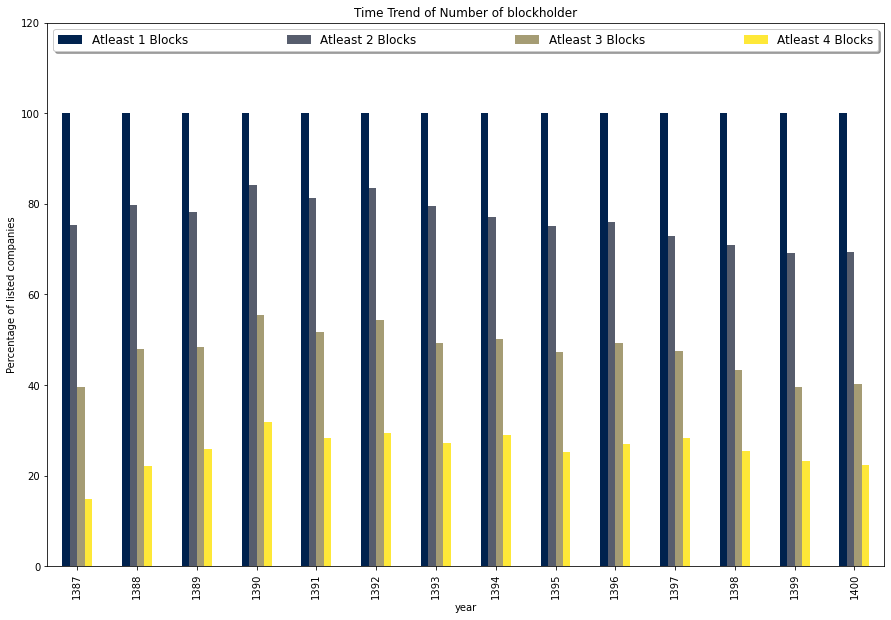

In [90]:
ccc.plot(x='year', kind='bar', stacked=False,ylabel='Percentage of listed companies', title='Time Trend of Number of blockholder',
figsize=(15,10),ylim=(0,120),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('fooOOooooOOOOOOOO.eps', bbox_inches='tight')   

In [94]:
ccc = df3.groupby(['year','Holder_Number']).count().reset_index()
ccc['total'] = ccc.groupby('year').firm.transform(sum)
ccc['Cumsum'] = ccc.sort_values(by = ['year','Holder_Number'] , ascending =False).groupby(['year']).firm.transform(lambda x: x.cumsum())
ccc.drop(ccc[ccc['Holder_Number'] > 4].index, inplace = True)
ccc['percent'] = (ccc.Cumsum/ccc.total)*100
ccc 

,year,Holder_Number,firm,group_name,Mean_marketcap,total_percent_ownership,institutional_percent_ownership,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,Diversity_identity,Diversity_size,Diversity_horizon,Diversity_Index,total,Cumsum,percent
0,1387,1,74,74,74,74,74,74,74,74,74,74,74,74,301,301,100.000000
1,1387,2,108,108,108,108,108,108,108,108,108,108,108,108,301,227,75.415282
2,1387,3,74,74,74,74,74,74,74,74,74,74,74,74,301,119,39.534884
3,1387,4,29,29,29,29,29,29,29,29,29,29,29,29,301,45,14.950166
7,1388,1,64,64,64,64,64,64,64,64,64,64,64,64,315,315,100.000000
8,1388,2,100,100,100,100,100,100,100,100,100,100,100,100,315,251,79.682540
9,1388,3,81,81,81,81,81,81,81,81,81,81,81,81,315,151,47.936508
10,1388,4,42,42,42,42,42,42,42,42,42,42,42,42,315,70,22.222222
14,1389,1,72,72,72,72,72,72,72,72,72,72,72,72,332,332,100.000000
15,1389,2,99,99,99,99,99,99,99,99,99,99,99,99,332,260,78.313253


In [95]:
ccc['percent'].loc[ccc['Holder_Number'].isin([1, 2, 3])]=(ccc.firm/ccc.total)*100
ccc

C:\Users\masou\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,year,Holder_Number,firm,group_name,Mean_marketcap,total_percent_ownership,institutional_percent_ownership,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,Diversity_identity,Diversity_size,Diversity_horizon,Diversity_Index,total,Cumsum,percent
0,1387,1,74,74,74,74,74,74,74,74,74,74,74,74,301,301,24.584718
1,1387,2,108,108,108,108,108,108,108,108,108,108,108,108,301,227,35.880399
2,1387,3,74,74,74,74,74,74,74,74,74,74,74,74,301,119,24.584718
3,1387,4,29,29,29,29,29,29,29,29,29,29,29,29,301,45,14.950166
7,1388,1,64,64,64,64,64,64,64,64,64,64,64,64,315,315,20.317460
8,1388,2,100,100,100,100,100,100,100,100,100,100,100,100,315,251,31.746032
9,1388,3,81,81,81,81,81,81,81,81,81,81,81,81,315,151,25.714286
10,1388,4,42,42,42,42,42,42,42,42,42,42,42,42,315,70,22.222222
14,1389,1,72,72,72,72,72,72,72,72,72,72,72,72,332,332,21.686747
15,1389,2,99,99,99,99,99,99,99,99,99,99,99,99,332,260,29.819277


In [96]:
ccc=ccc.pivot(index='year', columns='Holder_Number')['percent']
ccc=ccc.reset_index(drop=False)
ccc.columns = ['year', '1 Blocks', '2 Blocks', ' 3 Blocks', '4 Blocks or more']
ccc

,year,1 Blocks,2 Blocks,3 Blocks,4 Blocks or more
0,1387,24.584718,35.880399,24.584718,14.950166
1,1388,20.317460,31.746032,25.714286,22.222222
2,1389,21.686747,29.819277,22.590361,25.903614
3,1390,15.833333,28.611111,23.611111,31.944444
4,1391,18.766756,29.490617,23.324397,28.418231
5,1392,16.577540,29.144385,24.866310,29.411765
6,1393,20.370370,30.423280,21.957672,27.248677
7,1394,22.900763,26.972010,21.119593,29.007634
8,1395,24.836601,27.886710,22.004357,25.272331
9,1396,23.909250,26.701571,22.338569,27.050611


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


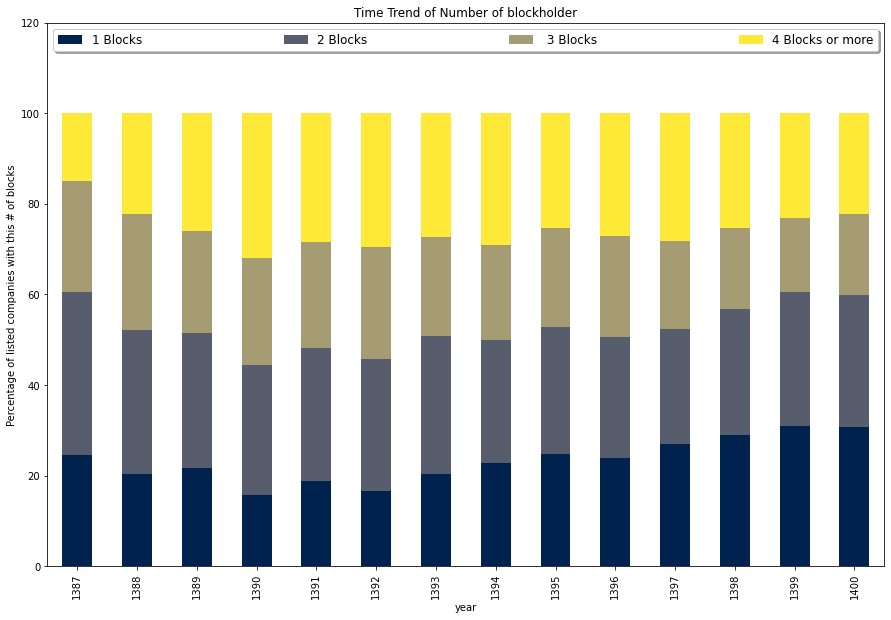

In [97]:
ccc.plot(x='year', kind='bar', stacked=True,ylabel='Percentage of listed companies with this # of blocks', title='Time Trend of Number of blockholder',
figsize=(15,10),ylim=(0,120),cmap='cividis')


plt.legend(loc='best', mode = "expand", ncol = 4,fancybox=True, shadow=True,prop={'size':12})

plt.savefig('fooOOooogfg.eps', bbox_inches='tight')   

# Average blockownership

In [106]:
df3.head()

,firm,group_name,year,Mean_marketcap,total_percent_ownership,institutional_percent_ownership,Holder_Number,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,Diversity_identity,Diversity_size,Diversity_horizon,Diversity_Index
0,آ س پ,انبوه سازی، املاک و مستغلات,1390,7.287942e+05,83.69,83.69,2,2,1,1,0.000000,0.138003,0.000000,0.292104
1,آ س پ,انبوه سازی، املاک و مستغلات,1391,7.448067e+05,77.73,77.73,3,3,1,1,0.000000,0.495722,0.473986,-0.167369
2,آ س پ,انبوه سازی، املاک و مستغلات,1392,8.282403e+05,68.38,68.38,2,2,1,1,0.000000,0.470746,0.470746,-0.150924
3,آ س پ,انبوه سازی، املاک و مستغلات,1393,1.244158e+06,84.35,84.35,4,4,2,2,0.180853,0.439567,0.498915,-0.258310
4,آ س پ,انبوه سازی، املاک و مستغلات,1394,9.978230e+05,84.36,84.36,4,4,2,2,0.180834,0.439016,0.294216,-0.150769


In [107]:
qqq=df3.groupby(['year'])[['total_percent_ownership']].mean()
qqq=qqq.reset_index(drop=False)
qqq.columns = ['year', 'Average blockownership']
qqq

,year,Average blockownership
0,1387,54.681561
1,1388,58.487016
2,1389,58.598012
3,1390,72.141222
4,1391,69.986139
5,1392,71.713235
6,1393,71.688783
7,1394,70.954224
8,1395,69.853333
9,1396,69.646283


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


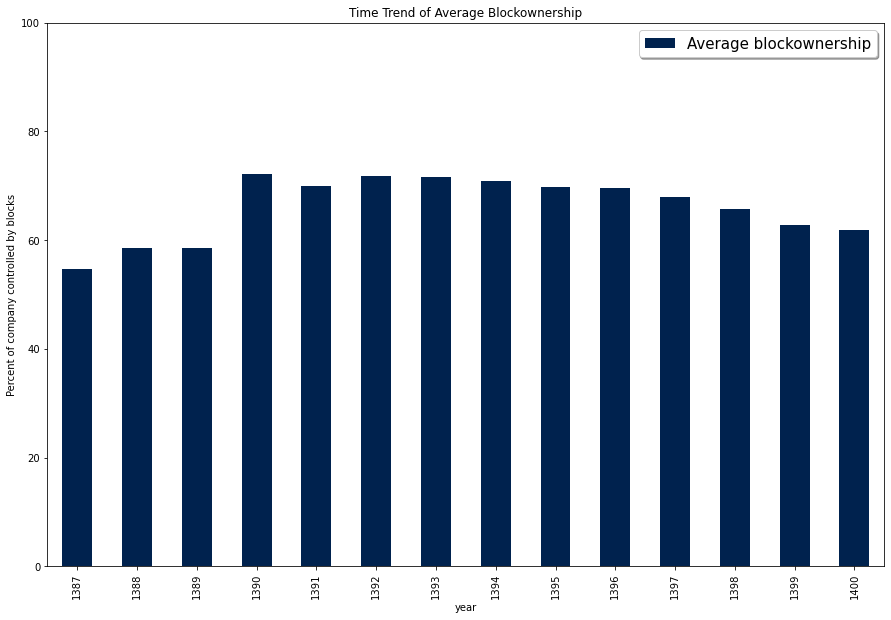

In [108]:
qqq.plot(x='year', kind='bar',stacked=False,ylabel='Percent of company controlled by blocks', title='Time Trend of Average Blockownership',
figsize=(15,10),ylim=(0,100),cmap='cividis')

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3))
plt.legend(loc='upper right', ncol = 1,fancybox=True, shadow=True,prop={'size':15})

plt.savefig('fooOOffdfjtghyhyuoooo.eps', bbox_inches='tight') 

# control variables

In [4]:
df4 = pd.read_excel (r'D:\User\Desktop\thesis\data\blockholders\main data\firm\statements_variables2.xlsx')
df4.head()

,firm,year,sales,net_income,fixed_asset,total_asset,total_debt,CEQ,FCF,capex,ROA,Sales_Growth,Firm_Size,Fixed_Assets,Capital_Expenditures,Leverage,Amihud_Illiquidity
0,آ س پ,1390,451559,180220,34111,573994,185683,388311,0.081666,-13004,0.313975,137.072446,13.260374,0.059427,-0.022655,0.323493,0.000013
1,آ س پ,1391,519463,201009,40459,769359,390377,378982,0.105553,-5077,0.261268,15.037681,13.553313,0.052588,-0.006599,0.507406,0.000056
2,آ س پ,1392,504561,170395,35980,1192428,818995,373433,0.078276,-1993,0.142898,-2.868732,13.991502,0.030174,-0.001671,0.686830,0.000021
3,آ س پ,1393,392646,141262,32894,1220730,637919,582811,-0.064096,11019,0.115719,-22.180668,14.014960,0.026946,0.009027,0.522572,0.000022
4,آ س پ,1394,323812,112268,38543,1447582,432519,1015063,-0.148466,-10464,0.077556,-17.530804,14.185405,0.026626,-0.007229,0.298787,0.000070


In [5]:
df4.describe()

,year,sales,net_income,fixed_asset,total_asset,total_debt,CEQ,FCF,capex,ROA,Sales_Growth,Firm_Size,Fixed_Assets,Capital_Expenditures,Leverage,Amihud_Illiquidity
count,6100.000000,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6100.000000,6.100000e+03,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6.100000e+03
mean,1391.893279,7.069820e+06,2.044375e+06,1.888615e+06,1.050979e+07,4.644563e+06,5.865225e+06,0.108975,-5.498109e+05,0.133462,53.300669,14.156056,0.224831,-0.046594,0.566479,8.822160e-03
std,5.507191,3.710547e+07,1.360493e+07,1.039878e+07,4.348280e+07,2.275402e+07,2.842560e+07,0.139988,4.633541e+06,0.155605,176.957211,1.824449,0.203427,0.085565,0.316596,3.259041e-02
min,1380.000000,-9.097297e+07,-1.550500e+08,2.000000e+00,1.146500e+04,1.130000e+02,-6.423489e+07,-0.276164,-1.728316e+08,-0.403534,-90.973253,10.277256,0.000080,-0.392447,0.015028,7.979760e-09
25%,1388.000000,1.964890e+05,1.777450e+04,3.661600e+04,3.687435e+05,1.812735e+05,1.165080e+05,0.020956,-1.047518e+05,0.042014,-0.361514,12.817857,0.057753,-0.070105,0.363199,9.857355e-06
50%,1393.000000,6.649435e+05,1.037990e+05,1.327720e+05,1.234402e+06,5.794490e+05,4.580060e+05,0.089330,-1.810550e+04,0.116395,21.523575,14.026097,0.171951,-0.024147,0.565817,1.286024e-04
75%,1397.000000,2.220175e+06,5.206918e+05,5.551320e+05,4.288067e+06,1.917181e+06,1.840406e+06,0.182324,-1.483750e+03,0.216540,55.149092,15.271346,0.341811,-0.001508,0.728213,1.720673e-03
max,1400.000000,8.949831e+08,3.867139e+08,3.624720e+08,1.108840e+09,6.562839e+08,7.534798e+08,0.524579,4.481473e+07,0.595061,1740.953954,19.005256,0.855976,0.187620,2.279670,2.322055e-01


In [2]:
df5 = pd.read_excel (r'D:\User\Desktop\thesis\data\blockholders\main data\firm\final_dataa(t).xlsx')

In [19]:
df5.head()

,firm,group_name,year,Marketcap,total_percent_ownership,institutional_percent_ownership,Holder_Number,Number_of_Institutional_Blocks,type_Number,type_of_Institutional_Blocks,...,ROA_(t+1),FCF_(t+1),Tobins_Q_(t+2),ROA_(t+2),FCF_(t+2),Tobins_Q_(t+3),ROA_(t+3),FCF_(t+3),stock_id,group_id
0,آ س پ,انبوه سازی، املاک و مستغلات,1390,7.287942e+05,83.69,83.69,2,2,1,1,...,0.261268,0.105553,1.381413,0.142898,0.078276,1.541764,0.115719,-0.064096,17617474823279710,70
1,آ س پ,انبوه سازی، املاک و مستغلات,1391,7.448067e+05,77.73,77.73,3,3,1,1,...,0.142898,0.078276,1.541764,0.115719,-0.064096,0.988090,0.077556,-0.148466,17617474823279710,70
2,آ س پ,انبوه سازی، املاک و مستغلات,1392,8.282403e+05,68.38,68.38,2,2,1,1,...,0.115719,-0.064096,0.988090,0.077556,-0.148466,0.976861,0.013348,-0.099003,17617474823279710,70
3,آ س پ,انبوه سازی، املاک و مستغلات,1393,1.244158e+06,84.35,84.35,4,4,2,2,...,0.077556,-0.148466,0.976861,0.013348,-0.099003,0.853083,0.055194,-0.004196,17617474823279710,70
4,آ س پ,انبوه سازی، املاک و مستغلات,1394,9.978230e+05,84.36,84.36,4,4,2,2,...,0.013348,-0.099003,0.853083,0.055194,-0.004196,0.946372,0.004210,0.010600,17617474823279710,70


In [8]:
df5.Tobins_Q.describe()

count    4424.000000
mean        2.214869
std         2.002857
min         0.680750
25%         1.154572
50%         1.516234
75%         2.379231
max        13.437175
Name: Tobins_Q, dtype: float64

In [28]:
de=df5.groupby(['group_name'])[['firm']].nunique().reset_index()
de.to_excel (r'sector_sumstat.xlsx',index=False)
de

,group_name,firm
0,ابزارپزشکی، اپتیکی و اندازه‌گیری,1
1,استخراج زغال سنگ,4
2,استخراج سایر معادن,1
3,استخراج نفت گاز و خدمات جنبی جز اکتشاف,1
4,استخراج کانه های فلزی,13
5,اطلاعات و ارتباطات,1
6,انبوه سازی، املاک و مستغلات,33
7,انتشار، چاپ و تکثیر,1
8,تجارت عمده فروشی به جز وسایل نقلیه موتور,1
9,تولید محصولات کامپیوتری الکترونیکی ونوری,1


In [3]:
de2=df5.groupby(['group_name'])[['Capital_Expenditures']].describe()
de2
de2.to_excel (r'sector_sumstat3.xlsx')
